In [ ]:
# ECS171 — Lecture 3: Maximum Likelihood Estimation (MLE)

# We'll show that the OLS solution minimizes the sum of squared errors
# and maximizes the likelihood of the data assuming Gaussian noise.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


In [3]:
# True model: y = 4 + 3x + noise
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y_true = 4 + 3 * X
noise = np.random.randn(m, 1)       # Gaussian(0, 1)
y = y_true + noise


In [4]:
# Add bias column of 1's for intercept
X_b = np.c_[np.ones((m, 1)), X]  # shape (100, 2)


In [5]:
def negative_log_likelihood(params, X, y):
    """
    params = [w0, w1, log_sigma2]
    We optimize over log(sigma^2) to keep variance positive.
    """
    w = np.array(params[:2]).reshape(-1, 1)
    log_sigma2 = params[2]
    sigma2 = np.exp(log_sigma2)
    m = len(y)
    
    residuals = y - X @ w
    rss = (residuals.T @ residuals).item()
    
    nll = 0.5 * m * np.log(2 * np.pi * sigma2) + (0.5 / sigma2) * rss
    return nll


In [6]:
# Initial guesses for [w0, w1, log_sigma2]
init_params = np.array([0.0, 0.0, 0.0])

result = minimize(negative_log_likelihood, init_params, args=(X_b, y))
w0_mle, w1_mle, log_sigma2_mle = result.x
sigma2_mle = np.exp(log_sigma2_mle)

print(f"MLE estimates:")
print(f"  Intercept (w0): {w0_mle:.3f}")
print(f"  Slope (w1):     {w1_mle:.3f}")
print(f"  Sigma^2:        {sigma2_mle:.3f}")


MLE estimates:
  Intercept (w0): 4.215
  Slope (w1):     2.770
  Sigma^2:        0.807


In [7]:
w_ols = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
print(f"\nOLS solution:")
print(f"  Intercept: {w_ols[0,0]:.3f}")
print(f"  Slope:     {w_ols[1,0]:.3f}")



OLS solution:
  Intercept: 4.215
  Slope:     2.770


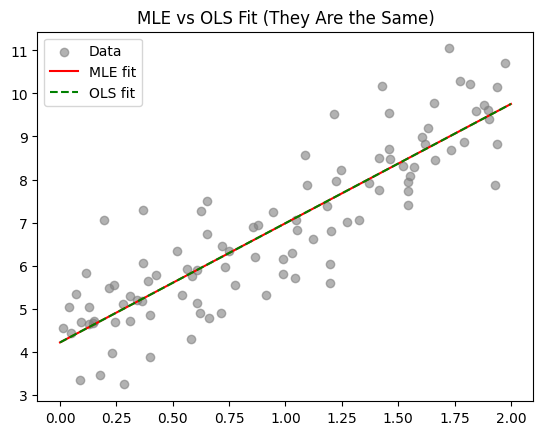

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_pred_mle = X_new_b @ np.array([[w0_mle], [w1_mle]])
y_pred_ols = X_new_b @ w_ols

plt.scatter(X, y, color='gray', alpha=0.6, label="Data")
plt.plot(X_new, y_pred_mle, "r-", label="MLE fit")
plt.plot(X_new, y_pred_ols, "g--", label="OLS fit")
plt.title("MLE vs OLS Fit (They Are the Same)")
plt.legend()
plt.show()
